**Data Import**



In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [156]:
app = pd.read_csv("application_date.csv")
prev_app = pd.read_csv("previous_application.csv")

In [157]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Feature selection**

In [158]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [159]:
app.shape

(200000, 122)

In [160]:
miss_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
miss_info.rename(columns={'index' : 'col_name', 0 : 'null_count'}, inplace=True)
miss_info.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [161]:
miss_info['miss_perc'] = miss_info['null_count']/app.shape[0]*100
miss_info.to_csv('missing_info.xlsx', index=False)
miss_info.head()

,col_name,null_count,miss_perc
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [162]:
drop_col = miss_info[miss_info['miss_perc'] >= 40]['col_name'].to_list()
app_miss_rvd = app.drop(labels=drop_col, axis=1)
app_miss_rvd.shape

(200000, 73)

In [163]:
app_miss_rvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
flag_col = [col for col in app_miss_rvd.columns if 'FLAG' in col]
len(flag_col)

28

In [165]:
flag_tgt_col = app_miss_rvd[flag_col+['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


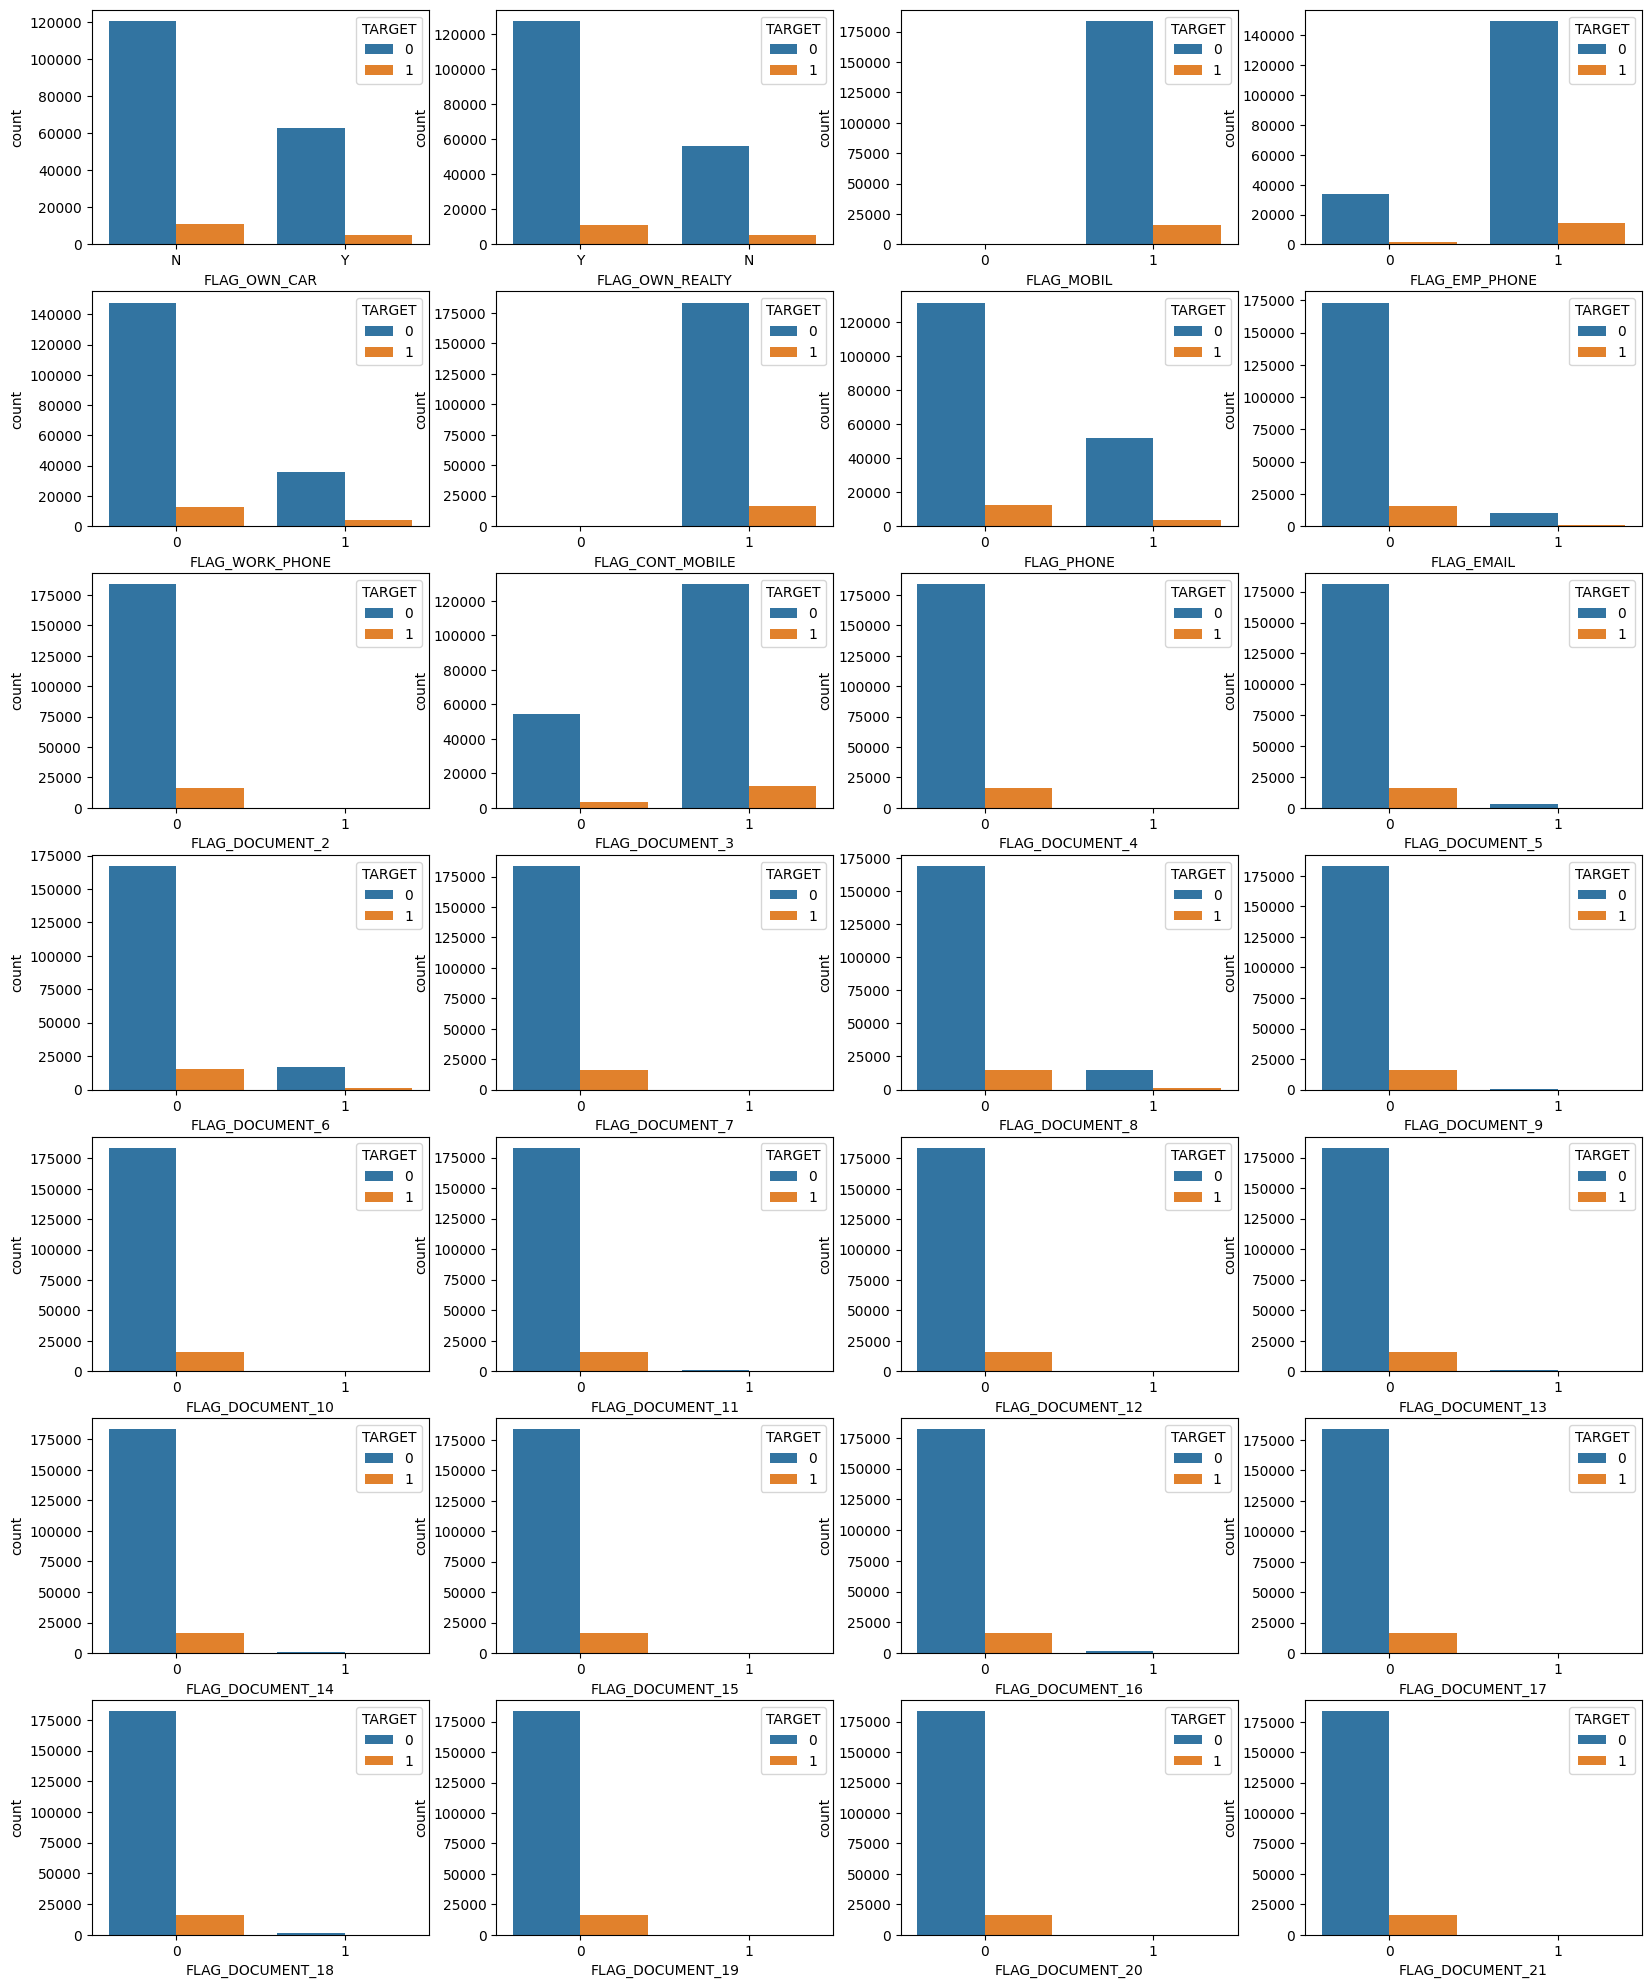

In [166]:
plt.figure(figsize=(20, 25))

for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col, x=col, hue='TARGET')

In [167]:
flag_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']
flag_corr_df = app_miss_rvd[flag_corr]


In [168]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    132040
Y     67960
dtype: int64

In [169]:
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N' : 0, 'Y' : 1})
flag_corr_df['FLAG_OWN_REALITY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N' : 0, 'Y' : 1})

flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

<ipython-input-169-3a621a64add2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N' : 0, 'Y' : 1})
<ipython-input-169-3a621a64add2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALITY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N' : 0, 'Y' : 1})


FLAG_OWN_CAR
0    132040
1     67960
dtype: int64

<ipython-input-170-5f53c0a76875>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = round(flag_corr_df.corr(), 2)


<Axes: >

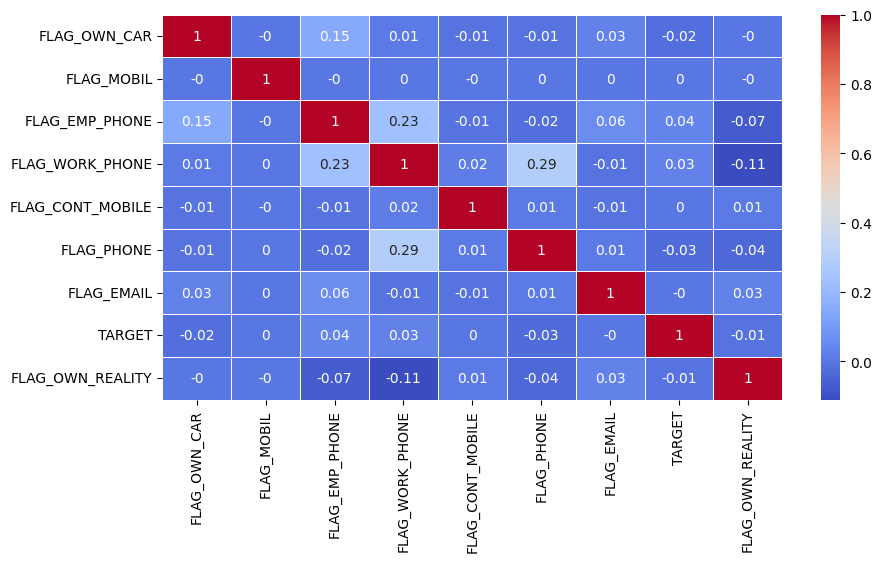

In [170]:
corr_df = round(flag_corr_df.corr(), 2)

plt.figure(figsize=(10,5))
sns.heatmap(corr_df, cmap='coolwarm', linewidths=.5, annot=True)

In [171]:
app_flag_rvd = app_miss_rvd.drop(labels=flag_col, axis=1)
app_flag_rvd.shape

(200000, 45)

In [172]:
app_flag_rvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

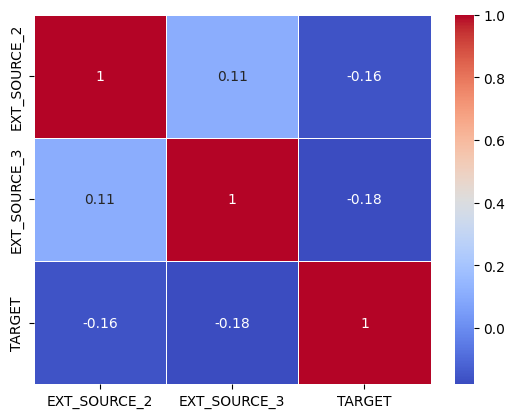

In [173]:
sns.heatmap(round(app_flag_rvd[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(), 2), cmap='coolwarm', linewidths=.5, annot=True)

In [174]:
app_score_col_rmvd = app_flag_rvd.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
app_score_col_rmvd.shape

(200000, 43)

**Feature engineering**

In [175]:
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


**Missing imputation**

In [176]:
app_score_col_rmvd['CNT_FAM_MEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna(app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0])

In [177]:
app_score_col_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [178]:
app_score_col_rmvd['OCCUPATION_TYPE'].value_counts()

Laborers                 35957
Sales staff              20692
Core staff               17965
Managers                 13822
Drivers                  12123
High skill tech staff     7359
Accountants               6437
Medicine staff            5579
Security staff            4407
Cooking staff             3884
Cleaning staff            2989
Private service staff     1718
Low-skill Laborers        1361
Waiters/barmen staff       853
Secretaries                842
Realty agents              473
HR staff                   365
IT staff                   330
Name: OCCUPATION_TYPE, dtype: int64

In [179]:
app_score_col_rmvd['OCCUPATION_TYPE'] = app_score_col_rmvd['OCCUPATION_TYPE'].fillna(app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0])
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [180]:
print(app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum())
app_score_col_rmvd['NAME_TYPE_SUITE'].value_counts()

816


Unaccompanied      161671
Family              26117
Spouse, partner      7423
Children             2133
Other_B              1100
Other_A               558
Group of people       182
Name: NAME_TYPE_SUITE, dtype: int64

In [181]:
app_score_col_rmvd['NAME_TYPE_SUITE'] = app_score_col_rmvd['NAME_TYPE_SUITE'].fillna(app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0])
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [182]:
app_miss_rvd['AMT_ANNUITY'].describe()

count    199992.000000
mean      27122.874265
std       14535.860248
min        1980.000000
25%       16524.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [183]:
app_score_col_rmvd['AMT_ANNUITY'] = app_score_col_rmvd['AMT_ANNUITY'].fillna(app_score_col_rmvd['AMT_ANNUITY'].mean())

In [184]:
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [185]:
amt_req_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [186]:
for col in amt_req_col:
    app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna((app_score_col_rmvd[col].median()))

In [187]:
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna((app_score_col_rmvd['AMT_GOODS_PRICE'].median()))

In [188]:
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [189]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


**Value modification**

In [190]:
days_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [191]:
for col in days_col:
    app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])

In [192]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
app_score_col_rmvd.nunique().sort_values()

REG_REGION_NOT_WORK_REGION          2
TARGET                              2
NAME_CONTRACT_TYPE                  2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_LIVE_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          8
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_QRT           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    16
OCCUPATION_TYPE                    18
AMT_REQ_CRED

In [194]:
app_score_col_rmvd['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

**Outlier detection & treatment**

In [195]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         45000.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

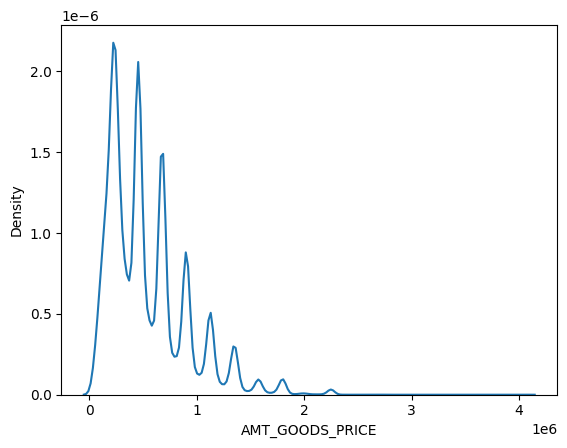

In [196]:
sns.kdeplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

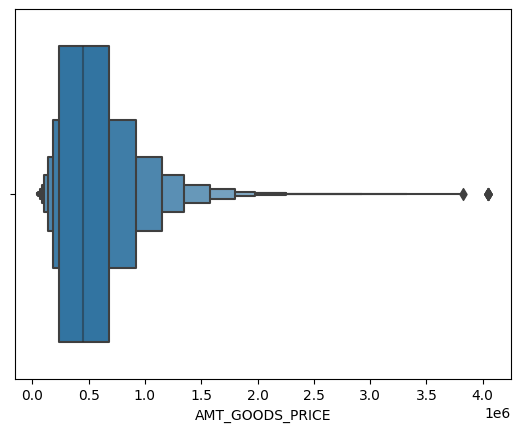

In [197]:
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

In [198]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     377667.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     819000.0
0.90    1098000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [199]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [200]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K         5666
100k-200K     21441
200K-300K     40898
300K-400K     13729
400K-500K     37249
500K-600K      8469
600K-700K     25992
700K-800K      5273
800K-900K     13983
Above 900K    27300
dtype: int64

In [201]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    144000.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [202]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [203]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [204]:
app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        41464
100K-150K     59649
150K-200K     41828
200K-250K     31231
250K-300K     11057
300K-350K      5762
350K-400K      3761
Above 400K     5248
dtype: int64

In [205]:
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [206]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.000
0.20     254700.000
0.30     306306.000
0.40     432000.000
0.50     513531.000
0.60     604152.000
0.70     755190.000
0.80     900000.000
0.90    1133748.000
0.99    1850290.065
Name: AMT_CREDIT, dtype: float64

In [207]:
app_score_col_rmvd['AMT_CREDIT'].max()

4050000.0

In [208]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [209]:
app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K       23494
200K-400K    52820
400K-600K    43043
600K-800K    28016
800K-900K    14218
900K-1M       5826
1M-2M        31289
2M-3M         1271
Above 3M        23
dtype: int64

In [210]:
app_score_col_rmvd['AMT_CREDIT'].isnull().sum()

0

In [211]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14710.5
0.30    18216.0
0.40    21865.5
0.50    24916.5
0.60    28057.5
0.70    32017.5
0.80    37575.0
0.90    45954.0
0.99    70218.0
Name: AMT_ANNUITY, dtype: float64

In [212]:
app_score_col_rmvd['AMT_ANNUITY'].max()

258025.5

In [213]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels=ranges)

In [214]:
app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-25K         100655
25K-50K        85496
50K-100K       13505
100K-150K        297
150K-200K         20
Above 200K        27
dtype: int64

In [215]:
app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [216]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2216.0
Name: DAYS_EMPLOYED, dtype: float64

In [217]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED']<app_score_col_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17531

In [218]:
app_score_col_rmvd['DAYS_EMPLOYED'].max()

365243

In [219]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)

In [220]:
app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         88699
5Y-10Y       42334
10Y-15Y      17792
15Y-20Y       7028
20Y-25Y       4068
25Y-30Y       2129
30Y-35Y       1282
35Y-40Y        536
40Y-45Y        121
45Y-50Y         13
50Y-65Y          0
Above 65Y    35996
dtype: int64

In [221]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10    10283.00
0.20    11685.00
0.30    13137.00
0.40    14412.00
0.50    15746.00
0.60    17220.00
0.70    18885.00
0.80    20483.00
0.81    20649.00
0.85    21319.00
0.90    22189.00
0.95    23206.05
0.99    24421.02
Name: DAYS_BIRTH, dtype: float64

In [222]:
app_score_col_rmvd['DAYS_BIRTH'].min()

7673

In [223]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_score_col_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [224]:
app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      29373
30Y-40Y      53472
40Y-50Y      49769
50Y-60Y      44208
Above 60Y    23178
dtype: int64

In [225]:
app_score_col_rmvd['DAYS_BIRTH'].isnull().sum()

0

**Data Analysis**

In [226]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [227]:
obj_var = app_score_col_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [228]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         181083
Revolving loans     18917
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

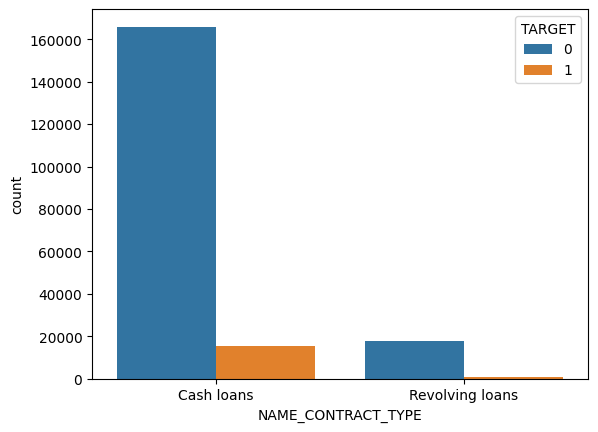

In [229]:
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [230]:
data_pct = app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)


In [231]:
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083879
1,Revolving loans,0.055347


In [232]:
data_pct['PCT'] = data_pct['TARGET']*100

In [233]:
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083879,8.387866
1,Revolving loans,0.055347,5.534704


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

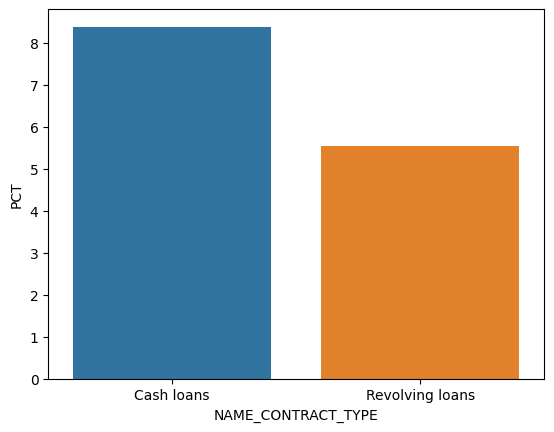

In [234]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

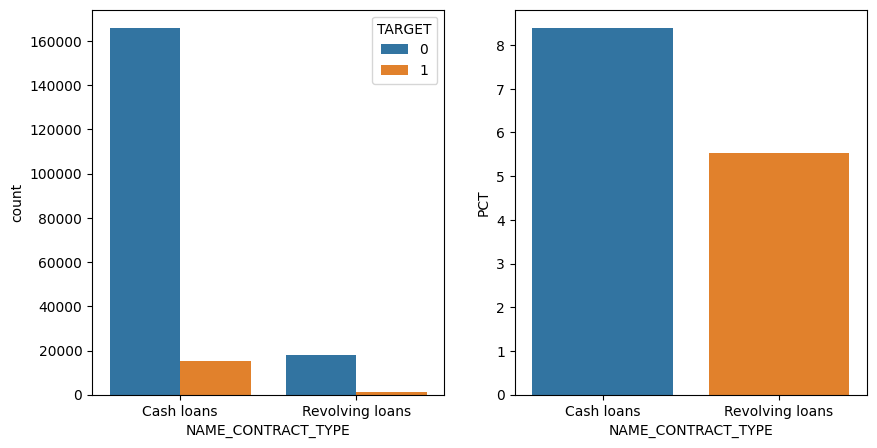

In [235]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

In [236]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

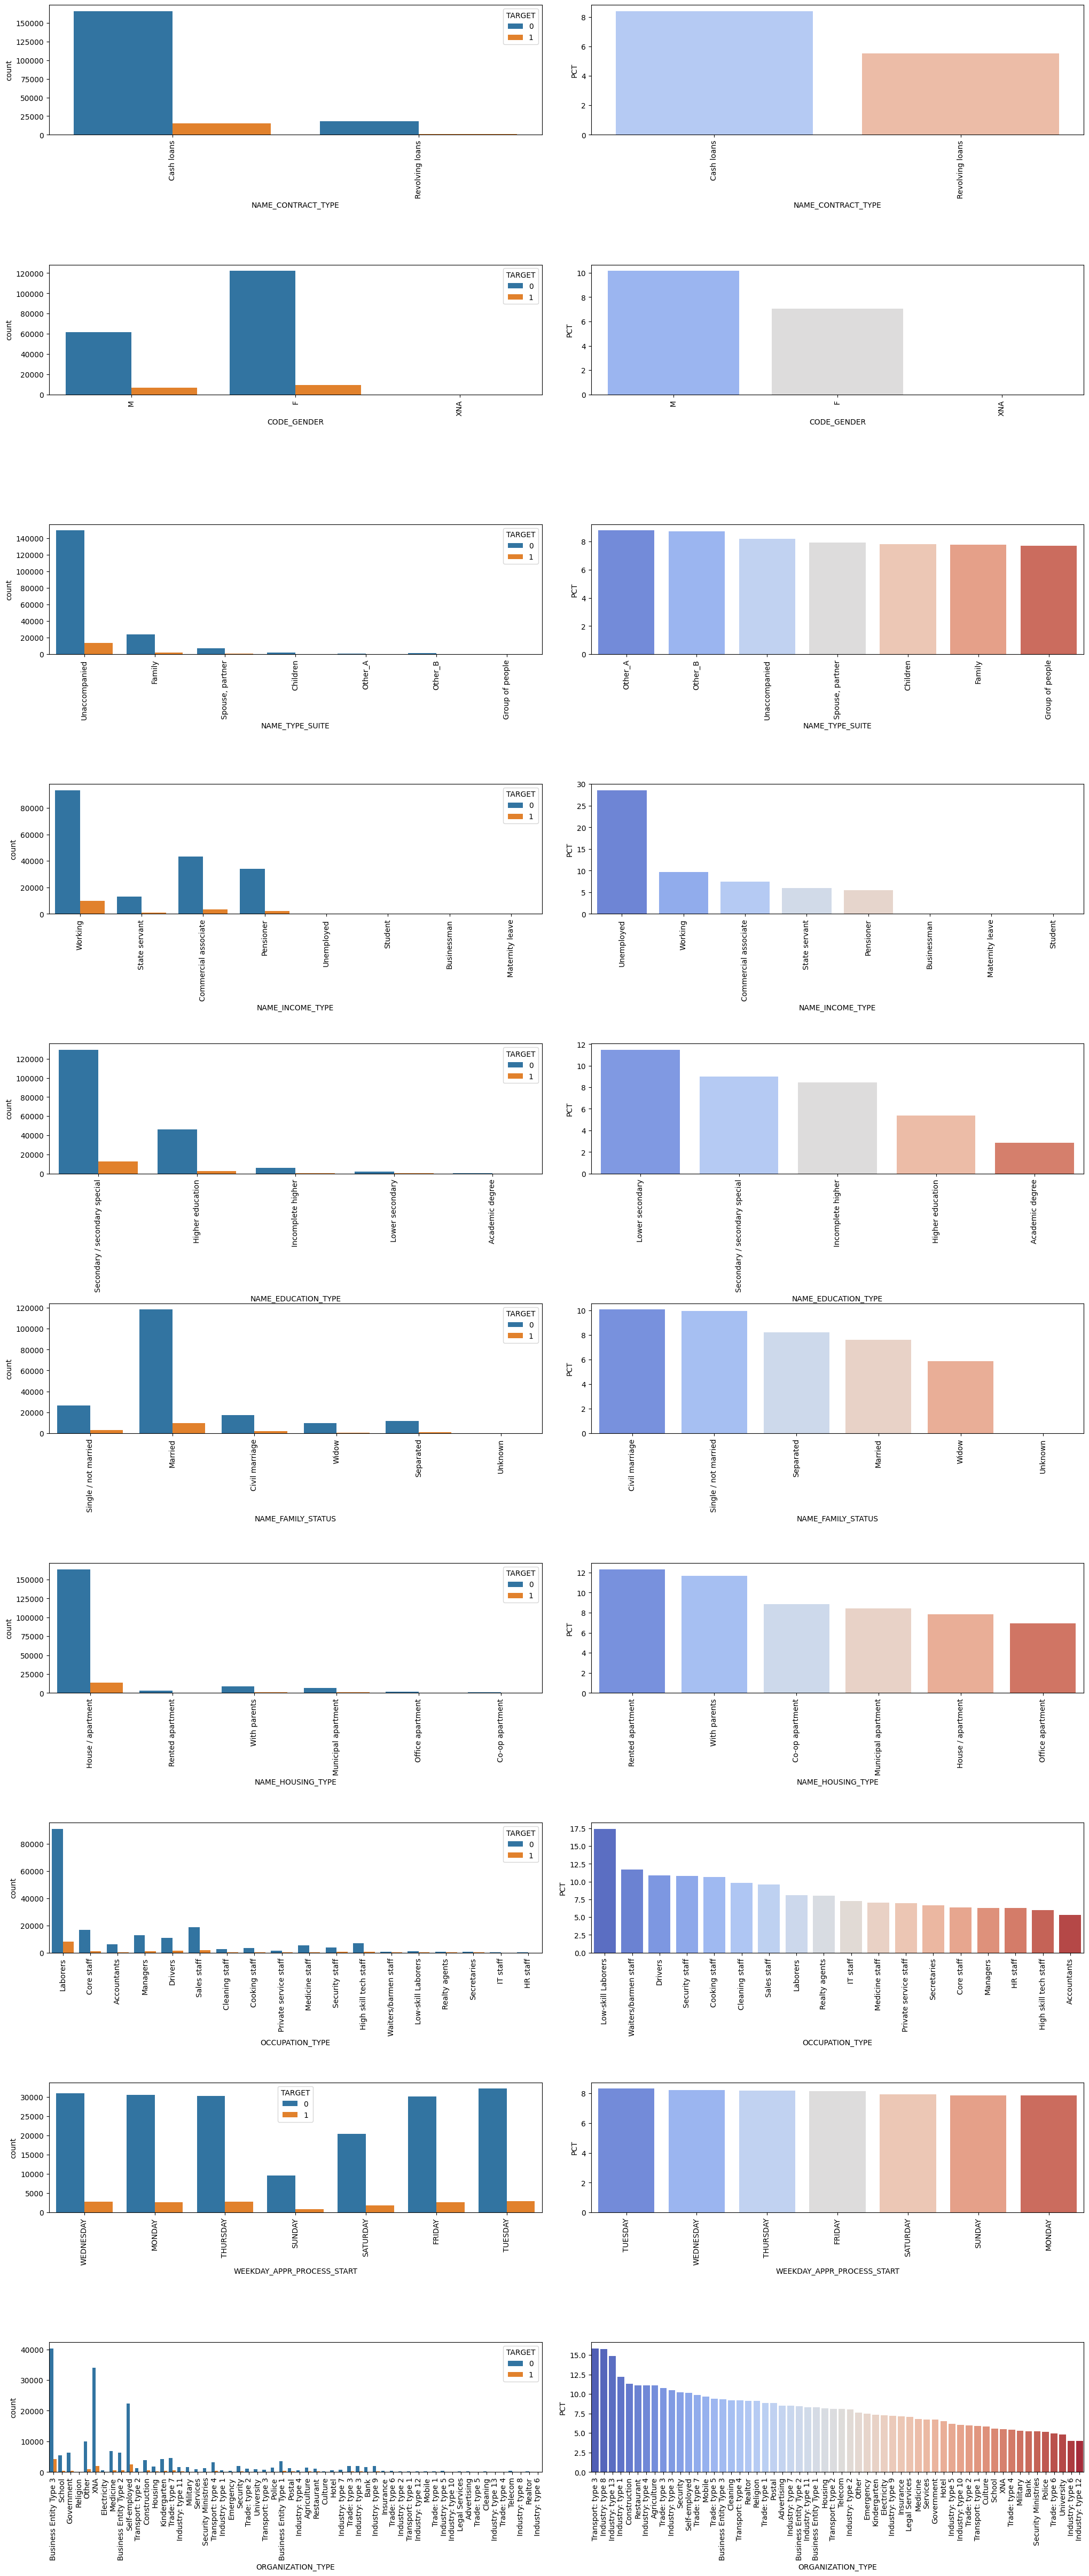

In [237]:
plt.figure(figsize=(25,60))


for i, var in enumerate(obj_var):

    data_pct = app_score_col_rmvd[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=app_score_col_rmvd,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

In [238]:
app_score_col_rmvd['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [239]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [240]:
num_var = app_score_col_rmvd.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

33

In [241]:
num_data = app_score_col_rmvd[num_var]
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [242]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.007452,-0.011446
CNT_CHILDREN,-0.007452,1.000000,0.006587
AMT_INCOME_TOTAL,-0.011446,0.006587,1.000000


In [243]:
defaulter_corr = defaulters.corr()
defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
defaulter_corr_unstck['corr'] = abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

<ipython-input-243-934adf3cb539>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1'


,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998168
202,AMT_GOODS_PRICE,AMT_CREDIT,0.982655
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956528
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.886049
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869785
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.845035
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.781375
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.748729
169,AMT_ANNUITY,AMT_CREDIT,0.748255
305,DAYS_EMPLOYED,DAYS_BIRTH,0.585833


In [244]:
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

<ipython-input-244-2128db0cd78f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1'


,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998592
202,AMT_GOODS_PRICE,AMT_CREDIT,0.987017
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950682
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879400
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.860145
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858894
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.829746
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.777371
169,AMT_ANNUITY,AMT_CREDIT,0.772007
305,DAYS_EMPLOYED,DAYS_BIRTH,0.626017


In [245]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

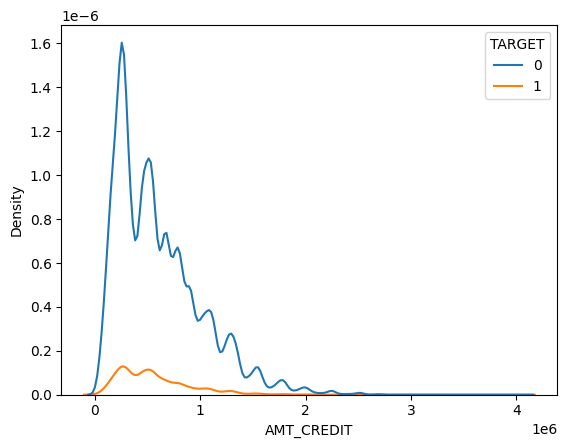

In [247]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

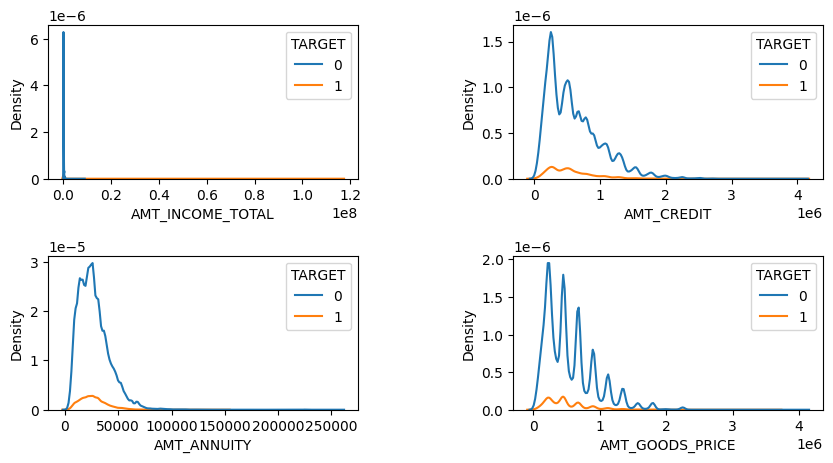

In [248]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [249]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

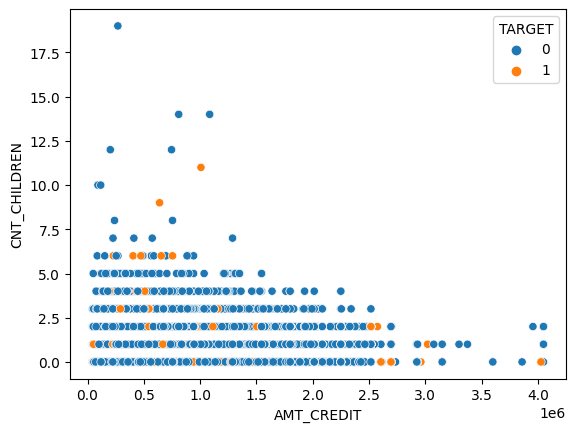

In [250]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [251]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

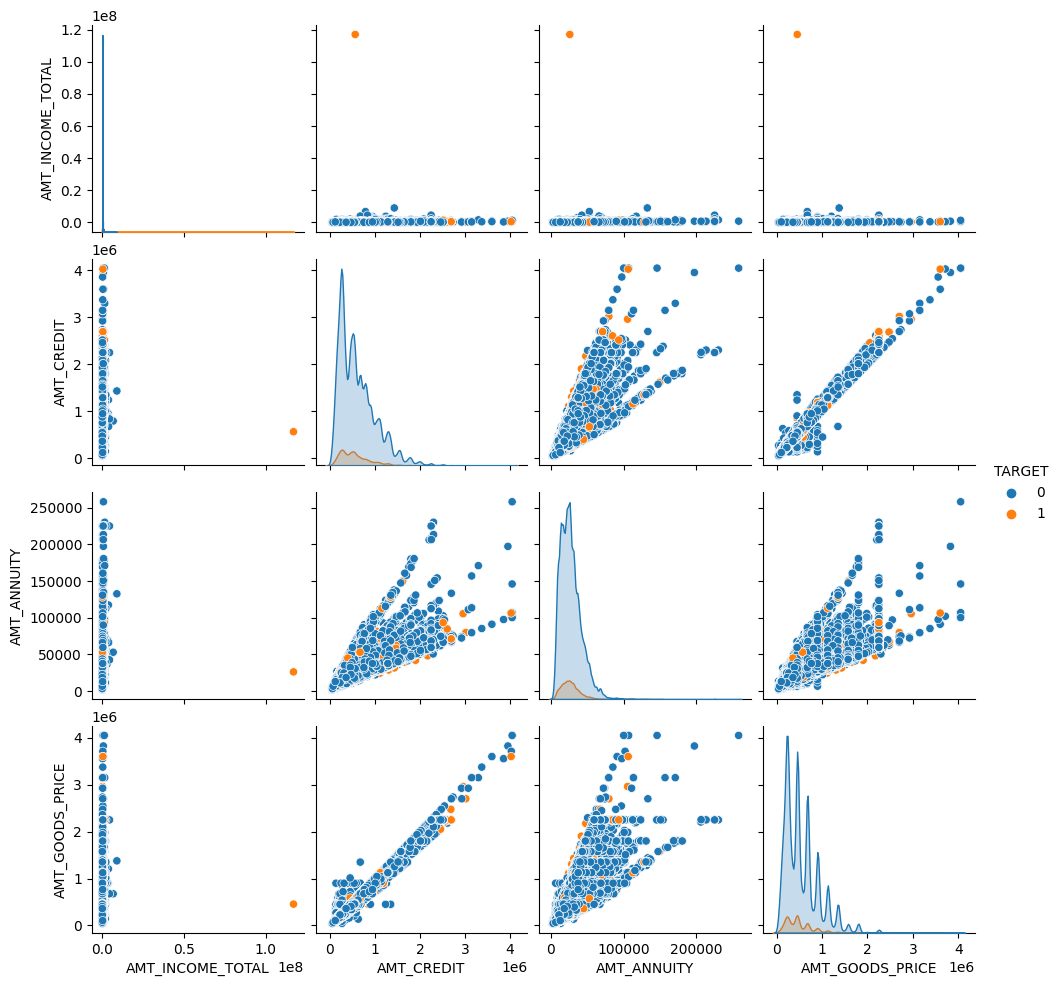

In [252]:
sns.pairplot(data=amt_var,hue='TARGET')

In [253]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT',
 'NAME_TYPE_SUITE']

In [254]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

9

In [255]:
len(prev_app.columns)

37

In [256]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)


len(prev_app_nva_col_rmvd.columns)

28

In [257]:
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [258]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781.0,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100

NFLAG_INSURED_ON_APPROVAL    38.523868
DAYS_TERMINATION             38.523868
DAYS_LAST_DUE                38.523868
DAYS_LAST_DUE_1ST_VERSION    38.523868
DAYS_FIRST_DUE               38.523868
DAYS_FIRST_DRAWING           38.523868
AMT_GOODS_PRICE              21.645822
AMT_ANNUITY                  21.305267
CNT_PAYMENT                  21.305267
PRODUCT_COMBINATION           0.020551
NAME_PRODUCT_TYPE             0.002936
NAME_YIELD_GROUP              0.002936
NAME_SELLER_INDUSTRY          0.002936
SELLERPLACE_AREA              0.002936
CHANNEL_TYPE                  0.002936
NAME_PORTFOLIO                0.002936
SK_ID_CURR                    0.002936
NAME_GOODS_CATEGORY           0.002936
NAME_CLIENT_TYPE              0.002936
CODE_REJECT_REASON            0.002936
NAME_PAYMENT_TYPE             0.002936
DAYS_DECISION                 0.002936
NAME_CONTRACT_STATUS          0.002936
NAME_CASH_LOAN_PURPOSE        0.002936
AMT_CREDIT                    0.002936
AMT_APPLICATION          

In [260]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      217154.683613
median    104791.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [261]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [262]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())

In [263]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])

In [264]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

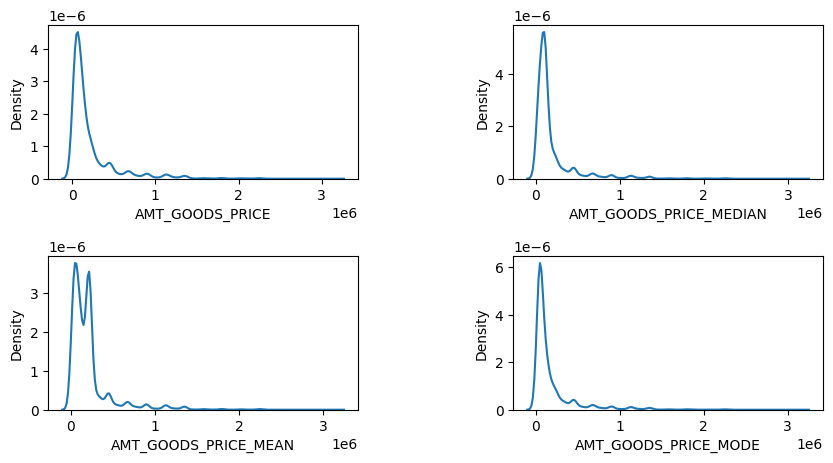

In [265]:
plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [266]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [267]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [268]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15560.037749
median     10936.440000
max       210115.485000
Name: AMT_ANNUITY, dtype: float64

In [269]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())

In [270]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])

In [271]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      15.617161
median    12.000000
max       60.000000
Name: CNT_PAYMENT, dtype: float64

In [272]:
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        5817
Refused          879
Unused offer     560
dtype: int64

In [273]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [274]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

DAYS_LAST_DUE_1ST_VERSION    13122
DAYS_FIRST_DUE               13122
DAYS_FIRST_DRAWING           13122
DAYS_TERMINATION             13122
NFLAG_INSURED_ON_APPROVAL    13122
DAYS_LAST_DUE                13122
NAME_GOODS_CATEGORY              1
NAME_YIELD_GROUP                 1
NAME_SELLER_INDUSTRY             1
SELLERPLACE_AREA                 1
CHANNEL_TYPE                     1
SK_ID_CURR                       1
NAME_PORTFOLIO                   1
NAME_PRODUCT_TYPE                1
CODE_REJECT_REASON               1
NAME_PAYMENT_TYPE                1
DAYS_DECISION                    1
NAME_CONTRACT_STATUS             1
NAME_CASH_LOAN_PURPOSE           1
AMT_CREDIT                       1
AMT_APPLICATION                  1
NAME_CONTRACT_TYPE               1
NAME_CLIENT_TYPE                 1
AMT_GOODS_PRICE_MEDIAN           0
AMT_GOODS_PRICE_MEAN             0
SK_ID_PREV                       0
PRODUCT_COMBINATION              0
CNT_PAYMENT                      0
AMT_GOODS_PRICE     

In [275]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [276]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL    13122
DAYS_TERMINATION             13122
DAYS_LAST_DUE                13122
DAYS_LAST_DUE_1ST_VERSION    13122
DAYS_FIRST_DUE               13122
DAYS_FIRST_DRAWING           13122
NAME_GOODS_CATEGORY              1
NAME_YIELD_GROUP                 1
NAME_SELLER_INDUSTRY             1
SELLERPLACE_AREA                 1
CHANNEL_TYPE                     1
NAME_PRODUCT_TYPE                1
SK_ID_CURR                       1
NAME_PORTFOLIO                   1
NAME_CLIENT_TYPE                 1
CODE_REJECT_REASON               1
NAME_PAYMENT_TYPE                1
DAYS_DECISION                    1
NAME_CONTRACT_STATUS             1
NAME_CASH_LOAN_PURPOSE           1
AMT_CREDIT                       1
AMT_APPLICATION                  1
NAME_CONTRACT_TYPE               1
CNT_PAYMENT                      0
PRODUCT_COMBINATION              0
AMT_GOODS_PRICE                  0
AMT_ANNUITY                      0
SK_ID_PREV                       0
dtype: int64

In [277]:
len(prev_app_nva_col_rmvd.columns)

28

In [278]:
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781.0,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
merged_df = pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500K-600K,100K-150K,400K-600K,0-25K,5Y-10Y,50Y-60Y,2001242,Cash loans,16509.600,180000.0,180000.0,180000.0,XNA,Approved,-865.0,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
1,100009,0,Cash loans,F,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0,Above 900K,150K-200K,1M-2M,25K-50K,5Y-10Y,30Y-40Y,1413109,Consumer loans,8996.760,98239.5,98239.5,98239.5,XAP,Approved,-449.0,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164.0,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0
2,100026,0,Cash loans,F,1,450000.0,497520.0,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,11146,4306,114.0,2518,Sales staff,3.0,3,2,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,468.0,0.0,0.0,0.0,0.0,0.0,5.0,400K-500K,Above 400K,400K-600K,25K-50K,10Y-15Y,30Y-40Y,1252218,Consumer loans,23608.485,132345.0,132345.0,132345.0,XAP,Approved,-1427.0,Cash through the bank,XAP,New,Computers,POS,XNA,Country-wide,200.0,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,-1396.0,-1246.0,-1246.0,-1243.0,0.0
3,100035,0,Cash loans,F,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Laborers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,400K-500K,250K-300K,600K-800K,0-25K,5Y-10Y,40Y-50Y,1339797,Cash loans,10936.440,0.0,0.0,104791.5,XNA,Refused,-138.0,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,0.0,XNA,0.0,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
4,100043,0,Cash loans,F,2,198000.0,641173.5,23157.0,553500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018850,17199,768,63.0,735,Private service staff,4.0,2,2,THURSDAY,13,0,0,0,0,0,0,Other

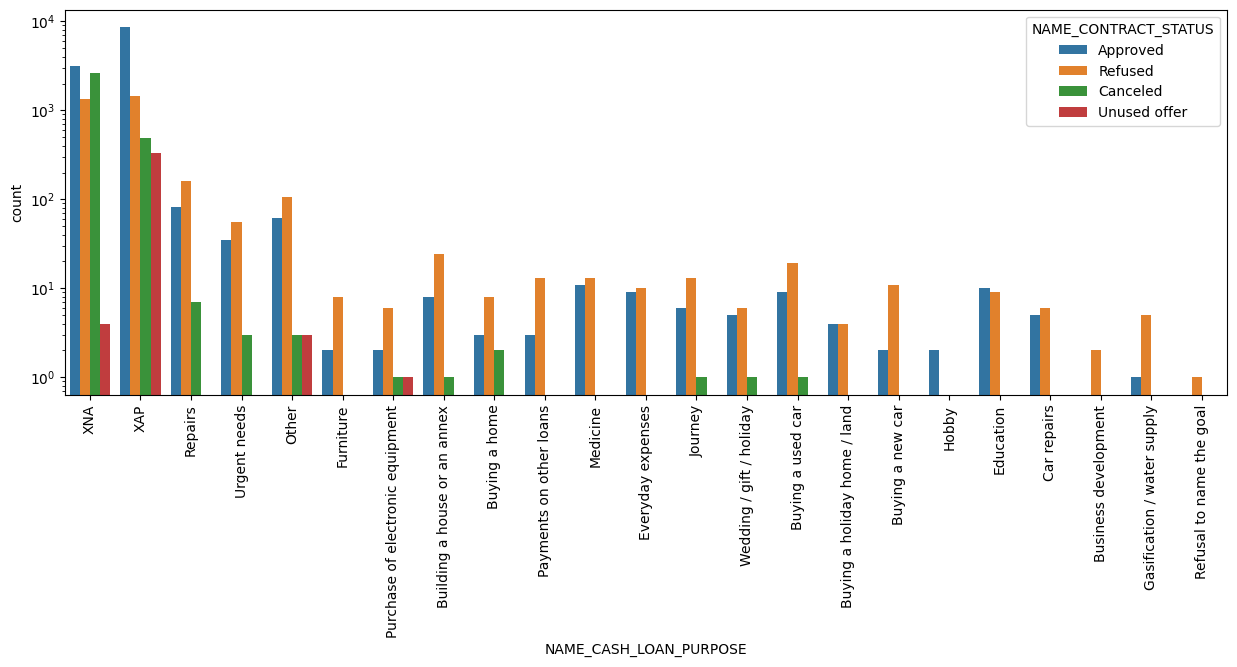

In [280]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

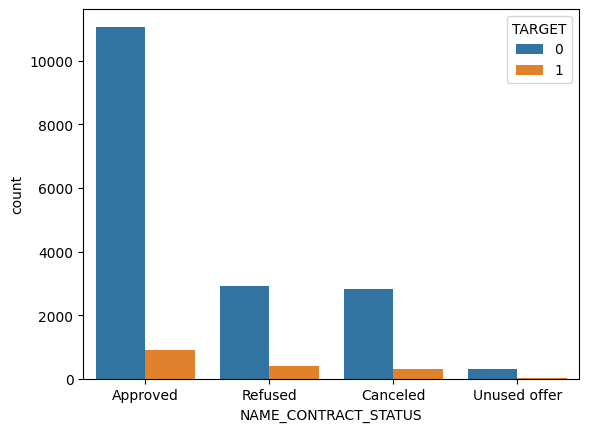

In [281]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

In [282]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,11076,11973,92.51
1,Approved,1,897,11973,7.49
2,Canceled,0,2816,3111,90.52
3,Canceled,1,295,3111,9.48
4,Refused,0,2902,3292,88.15
5,Refused,1,390,3292,11.85
6,Unused offer,0,319,343,93.00
7,Unused offer,1,24,343,7.00


<ipython-input-283-418096ff2513>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

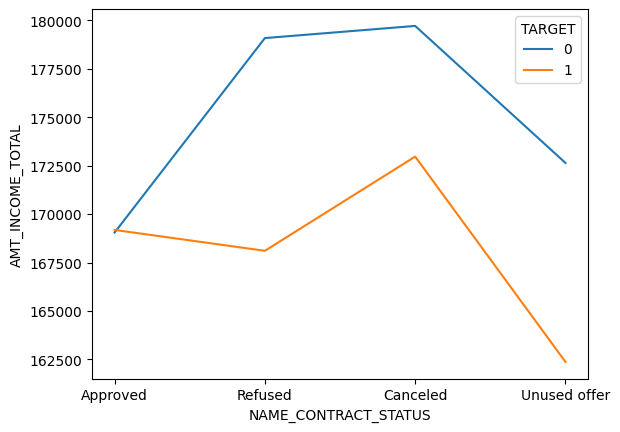

In [283]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [284]:
len(merged_df.columns)

76